 <font color='Blue'>Name:</font> Shreya Nair 
 
<font color='blue'> Email : </font>shreyanair11394@gmail.com, nair.shr@husky.neu.edu

In [1]:
#Importing Python Libraries 

# Draw inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
my_path = 'C:\\Users\\shrey\\Desktop\\ScreeningDS'

In [3]:
df = pd.read_csv(f'{my_path}/screening_exercise_orders_v201810.csv')

In [4]:
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null object
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


#### A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.

In [6]:
# Checking for Duplicate entries as a Data Pre-processing step
print(any(df.duplicated('customer_id')))  

True


In [7]:
df.duplicated('customer_id')[:25]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [8]:
 ids = df["customer_id"]


In [9]:
df[ids.isin(ids[ids.duplicated()])][:20]

,customer_id,gender,date,value,predicted_gender
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
8,1008,0,2017-01-01 18:01:04,207.99,0
10,1010,1,2017-01-01 19:41:40,1018.00,1
15,1015,0,2017-01-02 01:20:53,255.00,0
17,1017,0,2017-01-02 01:42:44,1000.00,0
18,1018,0,2017-01-02 01:52:59,274.60,0
19,1017,0,2017-01-02 02:08:52,186.00,0


In [10]:
# most recent date of order
order = df.groupby(['customer_id','gender'], sort=False)['date'].max()


In [11]:

order_df = order.to_frame().reset_index()

In [12]:
order_df.columns = ['customer_id','gender','most_recent_order_date']


In [13]:
order_count = df['customer_id'].value_counts()

# converting series to dataframe and resetting index
order_count_df = order_count.to_frame().reset_index()

# renaming column names
order_count_df.columns = ['customer_id','order_count']

In [14]:
#Sort the dataframe by customer_id ascending and display the first 10 rows
order_count_df.sort_values('customer_id', ascending=True)[:10]

,customer_id,order_count
4072,1000,1
5098,1001,1
508,1002,3
467,1003,4
7322,1004,1
1631,1005,2
886,1006,3
6205,1007,1
514,1008,3
5128,1009,1


### Sort the dataframe by customer_id ascending and display the first 10 rows

In [15]:
customer_dataframe = order_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))
print((customer_dataframe)[:10])

             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
1005              1    2017-12-16 01:39:27            2
1006              1    2017-05-09 15:27:20            3
1007              0    2017-01-01 15:59:50            1
1008              0    2017-12-17 05:47:48            3
1009              1    2017-01-01 19:27:17            1


In [16]:
df['date']= pd.to_datetime(df['date'])

In [17]:
df['date'][:10]

0   2017-01-01 00:11:31
1   2017-01-01 00:29:56
2   2017-01-01 01:30:31
3   2017-01-01 01:34:22
4   2017-01-01 03:11:54
5   2017-01-01 10:08:05
6   2017-01-01 15:42:57
7   2017-01-01 15:59:50
8   2017-01-01 18:01:04
9   2017-01-01 19:27:17
Name: date, dtype: datetime64[ns]

In [18]:
# converting date to Year_week_number
import time
from time import gmtime, strftime
df['Year_Week_Number'] = df.date.dt.strftime('%Y-%U')


In [19]:
df['Year_Week_Number'][:10]

0    2017-01
1    2017-01
2    2017-01
3    2017-01
4    2017-01
5    2017-01
6    2017-01
7    2017-01
8    2017-01
9    2017-01
Name: Year_Week_Number, dtype: object

In [20]:
Orders_count_week = df.groupby(['Year_Week_Number'])['value'].count()

In [21]:
Orders_count_week[:10]

Year_Week_Number
2017-01    175
2017-02    259
2017-03    356
2017-04    287
2017-05    209
2017-06    198
2017-07    233
2017-08    314
2017-09    271
2017-10    319
Name: value, dtype: int64

### B). Plot the count of orders per week for the store

In [22]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)

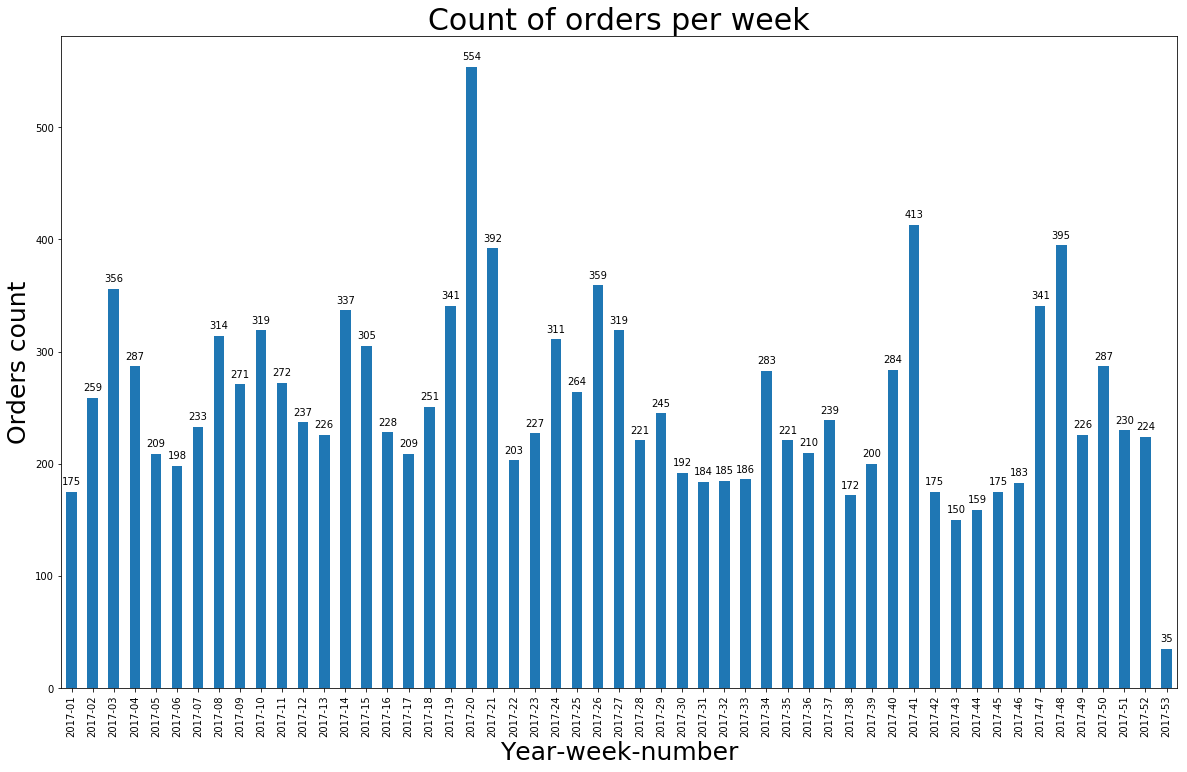

In [23]:
axis = Orders_count_week.plot.bar()

for p in axis.patches: axis.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of orders per week',fontsize=30)

plt.ylabel('Orders count',fontsize=25)
plt.xlabel('Year-week-number',fontsize=25)
plt.show()

### C). Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [24]:
print("""
Mean order value for gender 0 and for gender 1:
----------------------------------------------""")
#mean of '0' Gender
mean_0_gen = df.groupby('gender')['value'].mean()[0]

print(" mean order value of '0' gender is " + str(round(mean_0_gen)))





Mean order value for gender 0 and for gender 1:
----------------------------------------------
 mean order value of '0' gender is 364.0


In [25]:
# computing mean of gender1
mean_1_gen = df.groupby('gender')['value'].mean()[1]
print("Mean order value of '1' gender is " + str(round(mean_1_gen)))




Mean order value of '1' gender is 351.0


In [26]:
print("""
Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------""")

N = (df['customer_id'].count())/2

                                                     
print(" To check if difference is significant between gender 1 and gender 0")

var_0_gen = df.groupby('gender')['value'].var(ddof=1)[0]

# computing variance of gender1
var_1_gen = df.groupby('gender')['value'].var(ddof=1)[1]

s = np.sqrt((var_0_gen + var_1_gen)/2)
t = (mean_0_gen - mean_1_gen)/(s*np.sqrt(2/N))

print(" t value is " + str(round(t,2)))





Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------
 To check if difference is significant between gender 1 and gender 0
 t value is 1.98


In [27]:
from scipy import stats 

# Degree of freedom
df = 2*N - 2

# p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

# multiply p value with 2 because its a two tail t-test
p_new = round(2*p,4)

print(" p value is " + str(p_new))
print("\n")



 p value is 0.0482




In [28]:
if ( p_new < 0.05 ):
    print("""we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different and statistically significant" """)
else:
    print("""we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and thus we accept the null hypothesis and thus it proves that the "mean order value of the two genders are same" """)


we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of 0.0482 and thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different and statistically significant" 


In [29]:

print("Null Hypothesis : Mean order values of gender 0 and gender 1 are the same")
print("\n")
print("Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different")
print("\n")

Null Hypothesis : Mean order values of gender 0 and gender 1 are the same


Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different




### D). Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
df2=pd.read_csv(f'{my_path}/screening_exercise_orders_v201810.csv')

In [32]:
df2_predicted=['customer_id','gender', 'predicted_gender']

In [33]:
df2['new_Predicted_gender'] = df2.apply(lambda x: 1, axis=1)

In [35]:
tn, fp, fn, tp = confusion_matrix(df2['gender'], df2['new_Predicted_gender']).ravel()

print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  0
False Positives:  6759
False Negatives:  0
True Positives:  6712


### As we are assuming single gender prediction case is considered (I have considered gender prediction = 1 for all), FN and TN will be equal to zero. The positive count is TP = 6712 and rest of FP = 6759.

In [36]:

print (accuracy_score(df2['gender'], df2['new_Predicted_gender']))

0.4982555118402494


### The quality of prediction is approx. 50% accurate due to gender column values are not left or right skewed. Meaning equal number of gender = 0 and gender = 1 values are present. We can also notice that recall = 1 meaning our precision of classifying genders is less and is biased to capturing only gender = 1 customers. We captured all gender = 1 customers but also missed out a lot on capturing gender = 0 customers.

### E).   Describe one of your favorite tools or techniques and give a small example of how it’s helped you solve a problem. Limit your answer to one paragraph.

#### Answer: My favorite tool for Data Analysis and problem solving has always been Jupyter for Python Programming . It is Very easy to use for performing statistical analysis, modelling, cleaning and visualizing the data. I would like to give an example of how I used Jupyter - I have worked on Natural Language Processing topics as my personal projects, I have used Jupyter for Text Pre processing and Web Scraping.  Then create interactive visualization, Effective text mining with use of regular expressions. I have used ngram model creation along with NLTK with a visualized display of BOW, POS and WordCloud. It was very easy to expalin the insights to others and create interest to use this tool.